<a href="https://colab.research.google.com/github/Keya1006/CodeAlpha_Data-Science/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Advertising.csv to Advertising.csv
RMSE: 1.78
R² Score: 0.90

Feature Coefficients:
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64


<ipython-input-1-767518e22baa>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients.values, palette='coolwarm')


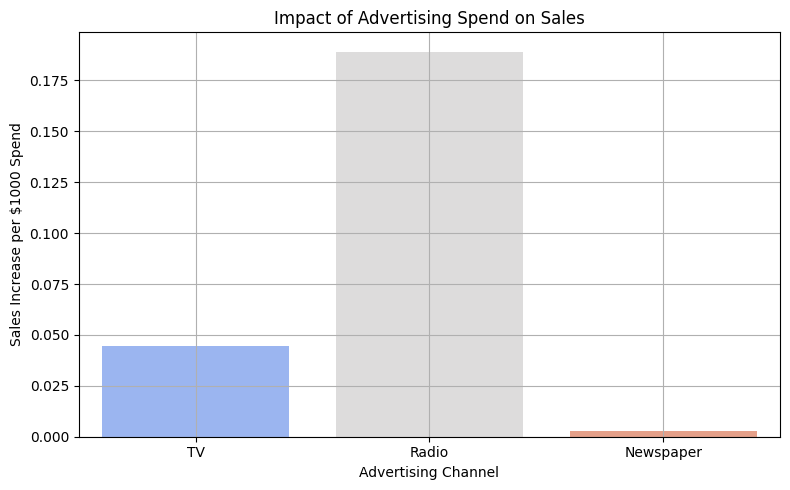


Predicted Sales: 16.67K units for input: {'TV': 200, 'Radio': 25, 'Newspaper': 5}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Advertising.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

coefficients = pd.Series(model.coef_, index=X.columns)
print("\nFeature Coefficients:")
print(coefficients)

plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients.index, y=coefficients.values, palette='coolwarm')
plt.title("Impact of Advertising Spend on Sales")
plt.ylabel("Sales Increase per $1000 Spend")
plt.xlabel("Advertising Channel")
plt.grid(True)
plt.tight_layout()
plt.show()

sample_input = pd.DataFrame({
    "TV": [200],
    "Radio": [25],
    "Newspaper": [5]
})
predicted_sales = model.predict(sample_input)[0]
print(f"\nPredicted Sales: {predicted_sales:.2f}K units for input: {sample_input.iloc[0].to_dict()}")


Saving Advertising.csv to Advertising (1).csv
RMSE: 1.78
R² Score: 0.9
Feature Coefficients:
 TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64


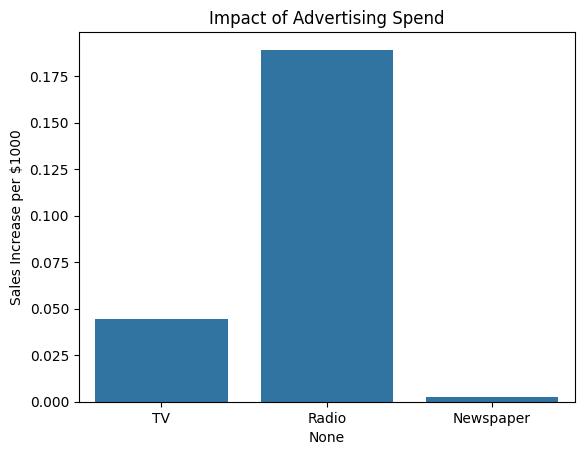


Enter your future advertising budget:
TV Budget (in $1000s): 333
Radio Budget (in $1000s): 445
Newspaper Budget (in $1000s): 55

Predicted Sales: 102.22K units


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('Advertising.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)


X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))


coefficients = pd.Series(model.coef_, index=X.columns)
print("Feature Coefficients:\n", coefficients)

sns.barplot(x=coefficients.index, y=coefficients.values)
plt.title("Impact of Advertising Spend")
plt.ylabel("Sales Increase per $1000")
plt.show()


print("\nEnter your future advertising budget:")
tv = float(input("TV Budget (in $1000s): "))
radio = float(input("Radio Budget (in $1000s): "))
newspaper = float(input("Newspaper Budget (in $1000s): "))

future_input = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})
future_prediction = model.predict(future_input)[0]
print(f"\nPredicted Sales: {future_prediction:.2f}K units")


🔍 Coefficients from Linear Regression Model:
 - TV: 0.045 → Every $1000 increase gives ~45 units in sales
 - Radio: 0.189 → Every $1000 increase gives ~189 units in sales
 - Newspaper: 0.003 → Every $1000 increase gives ~3 units in sales


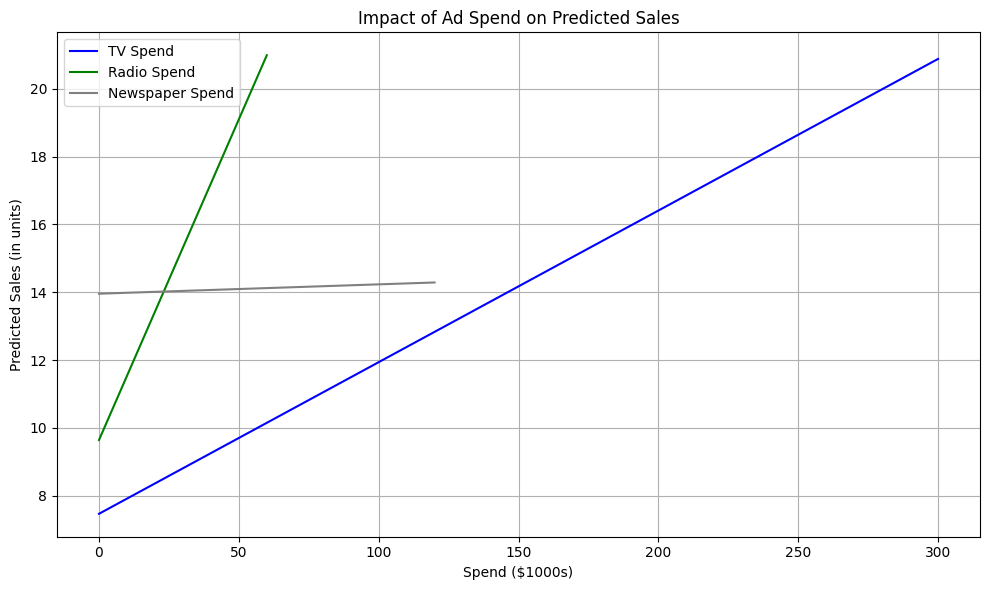

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



print("🔍 Coefficients from Linear Regression Model:")
for col in X.columns:
    effect = model.coef_[X.columns.get_loc(col)]
    print(f" - {col}: {effect:.3f} → Every $1000 increase gives ~{effect * 1000:.0f} units in sales")


def simulate_sales_change(ad_channel, base_values, range_vals):
    simulated_data = []
    for value in range_vals:
        new_input = base_values.copy()
        new_input[ad_channel] = value
        predicted_sale = model.predict(pd.DataFrame([new_input]))[0]
        simulated_data.append((value, predicted_sale))
    return simulated_data

base_ad_spend = {
    "TV": df["TV"].mean(),
    "Radio": df["Radio"].mean(),
    "Newspaper": df["Newspaper"].mean()
}


tv_range = np.linspace(0, 300, 30)
radio_range = np.linspace(0, 60, 30)
news_range = np.linspace(0, 120, 30)


tv_sim = simulate_sales_change("TV", base_ad_spend, tv_range)
radio_sim = simulate_sales_change("Radio", base_ad_spend, radio_range)
news_sim = simulate_sales_change("Newspaper", base_ad_spend, news_range)


plt.figure(figsize=(10, 6))
plt.plot(*zip(*tv_sim), label='TV Spend', color='blue')
plt.plot(*zip(*radio_sim), label='Radio Spend', color='green')
plt.plot(*zip(*news_sim), label='Newspaper Spend', color='gray')
plt.title("Impact of Ad Spend on Predicted Sales")
plt.xlabel("Spend ($1000s)")
plt.ylabel("Predicted Sales (in units)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
